<a href="https://colab.research.google.com/github/shivanshus/Machine-Learning-Projects/blob/main/Wisconsin_Breast_Cancer_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wisconsin Breast Cancer Classification model

## Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [4]:
data = pd.read_csv('/content/drive/MyDrive/cancerdata.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [5]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [6]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [7]:
print(data.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


In [8]:
x = data[[2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
y = data[[1]]

In [9]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
train_x, testval_x, train_y, testval_y = train_test_split(x, y, test_size=0.1, random_state=None, shuffle=True)
val_x, test_x, val_y, test_y = train_test_split(testval_x, testval_y, test_size=0.5, random_state=None, shuffle=True)

## Modeling the data to predict whether a given datapoint corresponds to benign or malignant class.

# Decision Tree classifier

### Using the validation data set to find the optimized hyperparameters.

### Plotting max_features(x) vs CV=5 accuracy(y) for DecisionTree

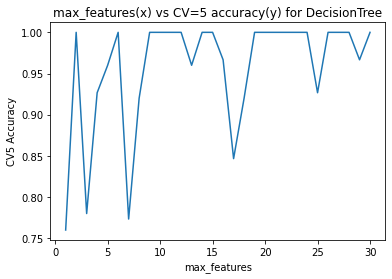

In [24]:
cv_acc_dt_maxf = []

for i in range(1,31,1):
    
    dt = DecisionTreeClassifier(criterion='entropy', max_features=i)
    cv_acc_dt = cross_validate(dt, val_x, val_y.ravel(), cv=5)
    cv_acc_dt_maxf.append(np.mean(cv_acc_dt['test_score']))

plt.plot(range(1,31,1),cv_acc_dt_maxf)
plt.ylabel('CV5 Accuracy')
plt.xlabel('max_features')
plt.title('max_features(x) vs CV=5 accuracy(y) for DecisionTree')
plt.show()

### Plotting max_depth(x) vs CV=5 accuracy(y) for DecisionTree

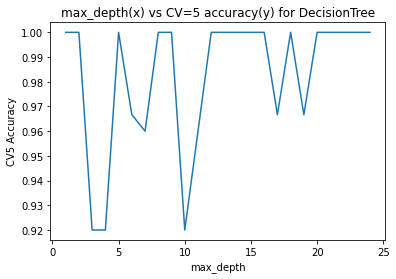

In [25]:
cv_acc_dt_maxd = []

for i in range(1,25,1):
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    cv_acc_dt = cross_validate(dt, val_x, val_y.ravel(), cv=5)
    cv_acc_dt_maxd.append(np.mean(cv_acc_dt['test_score']))

plt.plot(range(1,25,1),cv_acc_dt_maxd)
plt.ylabel('CV5 Accuracy')
plt.xlabel('max_depth')
plt.title('max_depth(x) vs CV=5 accuracy(y) for DecisionTree')
plt.show()

### So, max_features=10, max_depth=15 for Decision tree classifier.

### Plot n_estimators(x) vs CV=5 accuracy(y) for RandomForest

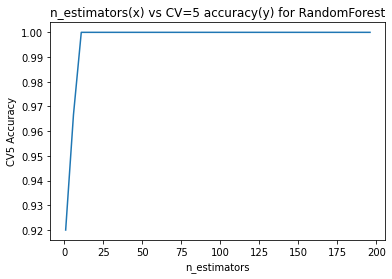

In [26]:
cv_acc_rf_nest = []

for i in range(1,200,5):
    
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy')
    cv_acc_rf = cross_validate(rf, val_x, val_y.ravel(), cv=5)
    cv_acc_rf_nest.append(np.mean(cv_acc_rf['test_score']))

plt.plot(range(1,200,5),cv_acc_rf_nest)
plt.ylabel('CV5 Accuracy')
plt.xlabel('n_estimators')
plt.title('n_estimators(x) vs CV=5 accuracy(y) for RandomForest')
plt.show()

### Plot max_features(x) vs CV=5 accuracy(y) for RandomForest

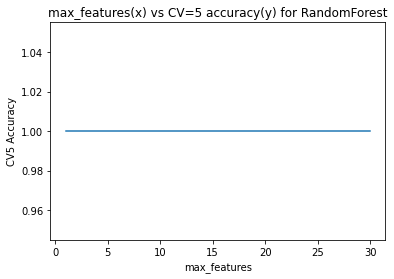

In [27]:
cv_acc_rf_maxf = []

for i in range(1,31,1):
    
    rf = RandomForestClassifier(criterion='entropy', max_features=i)
    cv_acc_rf = cross_validate(rf, val_x, val_y.ravel(),cv=5)
    cv_acc_rf_maxf.append(np.mean(cv_acc_rf['test_score']))

plt.plot(range(1,31,1),cv_acc_rf_maxf)
plt.ylabel('CV5 Accuracy')
plt.xlabel('max_features')
plt.title('max_features(x) vs CV=5 accuracy(y) for RandomForest')
plt.show()

### n_estimators = 20, max_features = 10 for Random forest classifier.

### Building RandomForest model on best computed hyperparameters to predict whether a given datapoint corresponds to benign or malignant class of the breast cancer.
#### n_estimators = 20 , max_features = 10

In [31]:
rf = RandomForestClassifier(n_estimators=30, criterion='entropy',max_features=10)

In [32]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
pred_y = rf.predict(test_x)

In [36]:
print("accuracy = ", accuracy_score(test_y, pred_y))
print("F-score = ", f1_score(test_y, pred_y, average='weighted'))
print("Precision = ", precision_score(test_y, pred_y, average='weighted'))
print("Recall = ", recall_score(test_y, pred_y, average='weighted'))

accuracy =  0.9655172413793104
F-score =  0.966110918715678
Precision =  0.9693486590038314
Recall =  0.9655172413793104


In [37]:
print(confusion_matrix(test_y, pred_y))

[[20  1]
 [ 0  8]]


### Building DecisionTree model for best computer hyperparameters to predict whether a given datapoint corresponds to benign or malignant class
#### ma_depth = 10 , max_features = 15

In [38]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=15)

In [39]:
dt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
pred_y = dt.predict(test_x)

In [42]:
print("accuracy = ", accuracy_score(test_y, pred_y))
print("F-score = ", f1_score(test_y, pred_y, average='weighted'))
print("Precision = ", precision_score(test_y, pred_y, average='weighted'))
print("Recall = ", recall_score(test_y, pred_y, average='weighted'))

accuracy =  0.8620689655172413
F-score =  0.8662835249042146
Precision =  0.8791288566243194
Recall =  0.8620689655172413


In [43]:
print(confusion_matrix(test_y, pred_y))

[[18  3]
 [ 1  7]]


## Conclusion

## Model's performance comparison

### Accuracy for DecisionTree Model =  0.86
### F1-score for DecisionTree Model =  0.86


### Accuracy for RandomForest Model =  0.96
### F1-score for RandomForest Model =  0.96

## So, Random forest model, which is essentially the instantiation of the Bagging classifier with decision tree as the base estimator, is a better model for the task of breast cancer detection application in the above implementation.